In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para a pasta que contém os arquivos
diretorio = '../Arquivos'


In [22]:
# Lista para armazenar os DataFrames
dict_df = {}
# Lista todos os arquivos no diretório atual
arquivos = os.listdir('../Arquivos')

# Filtra os arquivos que começam com 'dolar' e terminam com '.csv'
arquivos_filtrados = [arquivo for arquivo in arquivos if arquivo.startswith('dolar') and arquivo.endswith('.csv')]

for nome_arquivo in arquivos_filtrados:
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)
    df = pd.read_csv(caminho_arquivo)
    database = pd.to_datetime(nome_arquivo.replace('dolar-', '').replace('.csv', ''))
    df['arquivo'] = nome_arquivo.replace('dolar-', '').replace('.csv', '')
    # Adicionar o DataFrame à lista
    dict_df[database] = df


In [23]:
# Concatenar todos os DataFrames na lista em um único DataFrame
df_final = pd.concat(dict_df.values(), ignore_index=True)

# Ordenar o DataFrame pela coluna de data
df_final = df_final.sort_values('Data')  # Substitua 'data' pelo nome da sua coluna de data

# Pivotar o DataFrame para que cada coluna represente um arquivo e cada linha represente uma data
df_pivot = df_final.pivot(index='Data', columns='arquivo', values='Valor')

In [24]:
# Calcular a diferença absoluta entre os valores para cada data
diferencas = df_pivot.diff(axis=1).abs()

# Definir um limiar para o que você considera como "muito distante"
limiar = 0.1

# Identificar as datas onde a diferença entre os valores é maior que o limiar
anomalias = diferencas > limiar

# Obter as datas das anomalias
datas_anomalias = df_pivot.index[anomalias.any(axis=1)]

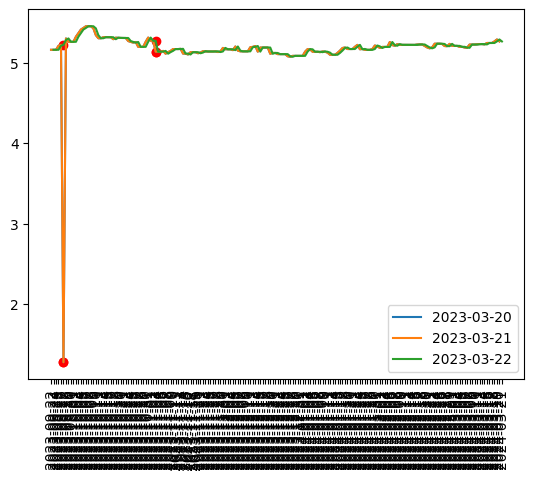

In [25]:
# Plotar os valores e as anomalias
# Plotar os valores para cada conjunto de dados
for coluna in df_pivot.columns:
    plt.plot(df_pivot[coluna].index, df_pivot[coluna], label=coluna)

# Plotar as anomalias
for data in datas_anomalias:
    valores_anomalias = df_pivot.loc[data]
    plt.scatter([data]*len(valores_anomalias), valores_anomalias, color='red')

plt.xticks(rotation='vertical')
plt.legend()
plt.show()